## Projeto com Regressão linear

In [50]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.model_selection import train_test_split #importei um metodo da skleanr onde divide em treino e teste
from sklearn.linear_model import LinearRegression #Criar uma instancia da classe que contem o modelo nos queremos usar
from sklearn import metrics
%matplotlib inline
init_notebook_mode(connected=True) 
cf.go_offline()

In [54]:
clientes = pd.read_csv('Ecommerce Customers')
clientes

Email  \
0          mstephenson@fernandez.com   
1                  hduke@hotmail.com   
2                   pallen@yahoo.com   
3            riverarebecca@gmail.com   
4      mstephens@davidson-herman.com   
5             alvareznancy@lucas.biz   
6              katherine20@yahoo.com   
7                 awatkins@yahoo.com   
8        vchurch@walter-martinez.com   
9                   bonnie69@lin.biz   
10             andrew06@peterson.com   
11            ryanwerner@freeman.biz   
12                 knelson@gmail.com   
13             wrightpeter@yahoo.com   
14             taylormason@gmail.com   
15               jstark@anderson.com   
16               wjennings@gmail.com   
17          rebecca45@hale-bauer.biz   
18           alejandro75@hotmail.com   
19            samuel46@love-west.net   
20                 megan33@gmail.com   
21                 agolden@yahoo.com   
22             vstafford@hotmail.com   
23   denise22@hernandez-townsend.com   
24            youngbarbara@yahoo.com   
25           william25@mcconnell.com   
26          ijones@schaefer-carr.net   
27             heatherhall@yahoo.com   
28           tinasmith@martinez.info   
29         chasejennifer@hotmail.com   
..                               ...   
470           kennethperry@bowen.org   
471               prussell@lopez.com   
472            mosleyjacob@yahoo.com   
473                  rhaas@yahoo.com   
474        antonioharris@hotmail.com   
475           austinthomas@gmail.com   
476            bethsullivan@reed.net   
477              ncummings@yahoo.com   
478                hking@hotmail.com   
479             annstone@hotmail.com   
480        christopher44@hotmail.com   
481       autumn88@mendoza-mills.com   
482                dhudson@ramos.net   
483               egomez@hotmail.com   
484    kimberlyruiz@smith-gordon.com   
485          mooremichelle@logan.com   
486                aaron22@gmail.com   
487       michelleshepherd@price.com   
488                zscott@wright.com   
489              tracy79@wheeler.net   
490              brian28@sanchez.org   
491       leonardhancock@hotmail.com   
492       davidsonkathleen@gmail.com   
493              nathan84@lowery.net   
494            kellydeborah@chan.biz   
495     lewisjessica@craig-evans.com   
496              katrina56@gmail.com   
497               dale88@hotmail.com   
498              cwilson@hotmail.com   
499        hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
5    645 Martha Park Apt. 611\nJeffreychester, MN 6...       FloralWhite   
6    68388 Reyes Lights Suite 692\nJosephbury, WV 9...     DarkSlateBlue   
7                Unit 6538 Box 8980\nDPO AP 09026-4941              Aqua   
8               860 Lee Key\nWest Debra, SD 97450-0495            Salmon   
9                PSC 2734, Box 5255\nAPO AA 98456-7482             Brown   
10   26104 Alexander Groves\nAlexandriaport, WY 282...            Tomato   
11               Unit 2413 Box 0347\nDPO AA 07580-2652            Tomato   
12   6705 Miller Orchard Suite 186\nLake Shanestad,...         RoyalBlue   
13    05302 Dunlap Ferry\nNew Stephaniehaven, MP 42268            Bisque   
14   7773 Powell Springs Suite 190\nSamanthaland, N...          DarkBlue   
15   49558 Ramirez Road Suite 399\nPhillipstad, OH ...              Peru   
16         6362 Wilson Mountain\nJohnsonfurt, GA 15169        PowderBlue   
17                8982 Burton Row\nWilsonton, PW 88606         OliveDrab   
18   64475 Andre Club Apt. 795\nPort Dannytown, PW ...              Cyan   
19   544 Alexander Heights Sui

In [9]:
clientes.info()
clientes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



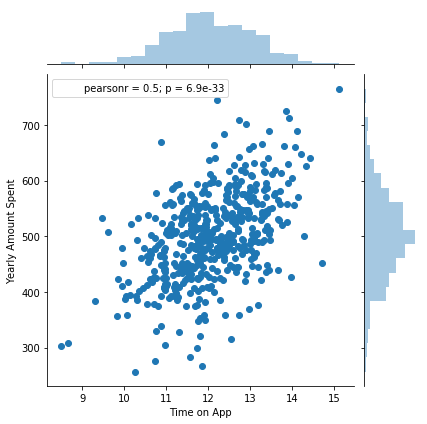

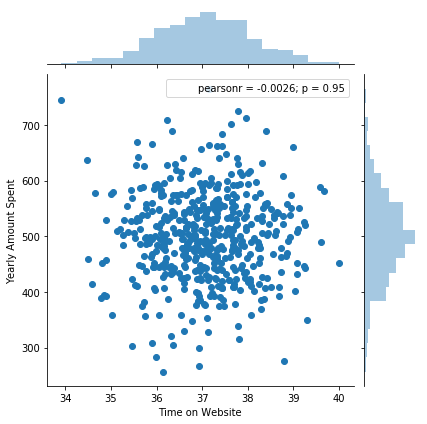

In [14]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=clientes)
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=clientes)

C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



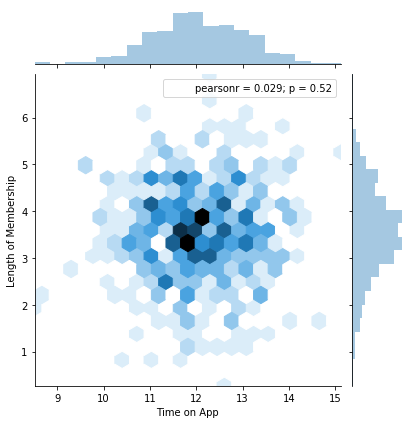

In [16]:
sns.jointplot(x='Time on App',y='Length of Membership',data=clientes, kind='hex')

C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



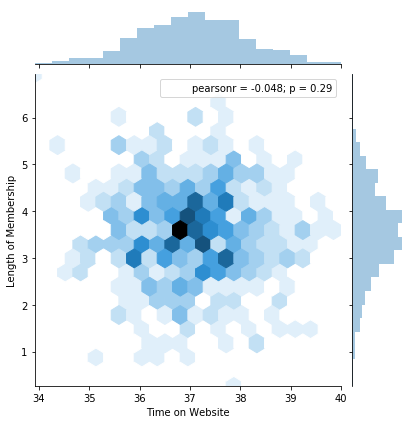

In [17]:
sns.jointplot(x='Time on Website',y='Length of Membership',data=clientes, kind='hex')

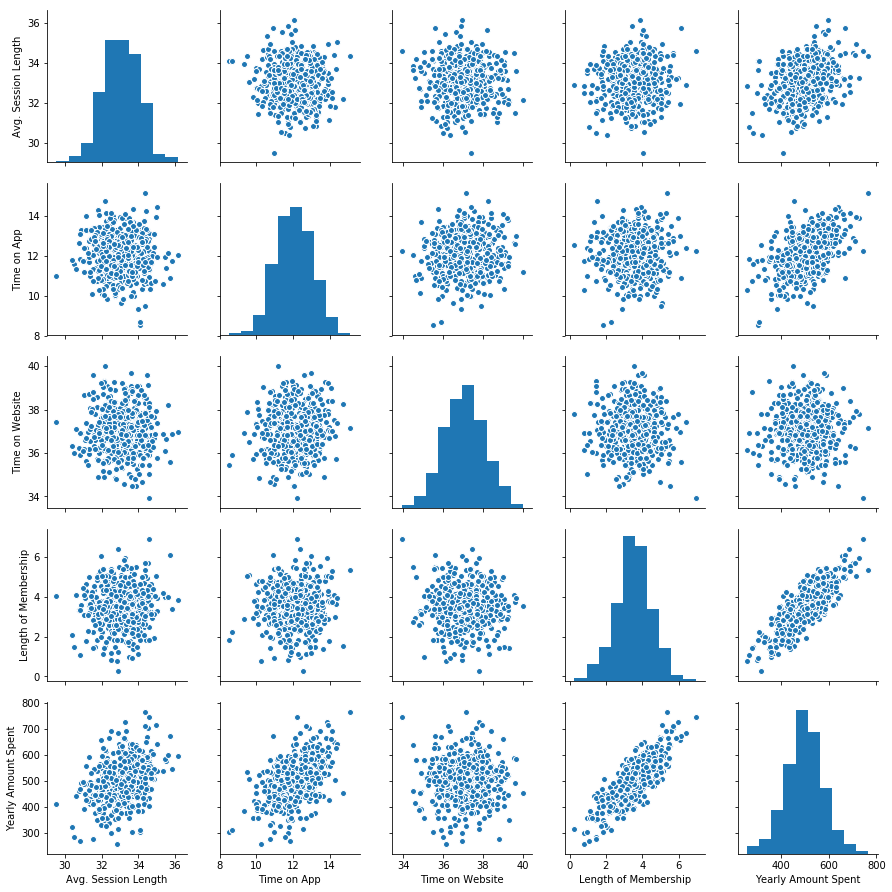

In [20]:
sns.pairplot(clientes)

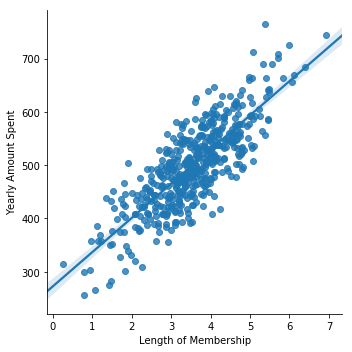

In [24]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=clientes)

In [26]:
clientes.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [42]:
y = clientes['Yearly Amount Spent']
x = clientes[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state=101)
lm = LinearRegression()
lm.fit(x_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [44]:
coeficiente = pd.DataFrame(lm.coef_,x.columns,columns=['Coeficiente'])

In [45]:
coeficiente
# em cada aumento em uma unidade do tempo médio que a pessoa fica na sessao com o estilista tem um aumento de 25.98 $ por ano
# cada minuto gasto em média no aplicativo corresponde a um aumento de 38.59 ao ano para a empresa
# Emprsa deve fidelizar mais os seus clientes,
# porque no aumento de 1 ano que a pessoa é cliente da empresa, da um aumento de 61.27 pra emrpesa

Coeficiente
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097

Text(0,0.5,'Previsao Y')

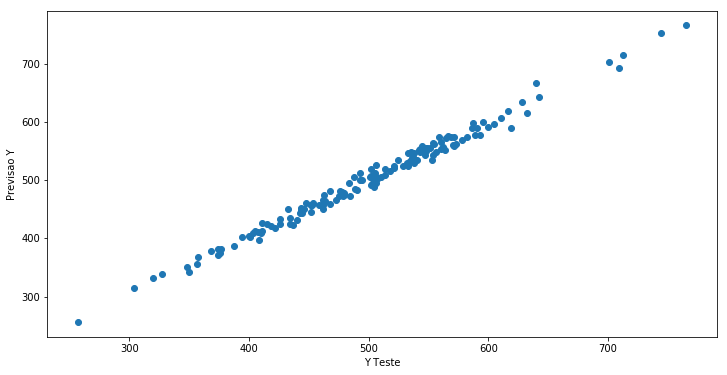

In [48]:
previsoes = lm.predict(x_teste)
plt.figure(figsize=(12,6))
plt.scatter(y_teste,previsoes)
plt.xlabel('Y Teste')
plt.ylabel('Previsao Y')

C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



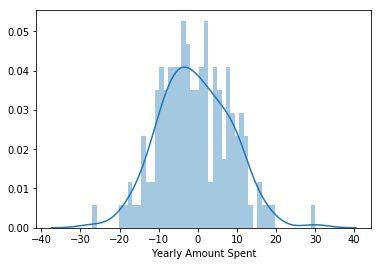

In [53]:
sns.distplot((y_teste-previsoes), bins=50)

In [51]:
print('MAE', metrics.mean_absolute_error(y_teste,previsoes))
print('MSE', metrics.mean_squared_error(y_teste,previsoes))
print('RMASE', np.sqrt(metrics.mean_squared_error(y_teste,previsoes)))

MAE 7.228148653430853
MSE 79.81305165097487
RMASE 8.933815066978656
